In [1]:
import pandas as pd
from fredapi import Fred

### FRED Data Loading by Quarter/Month

In [2]:
fred = Fred(api_key='4d084d7c0c75660f0dcc279a31965da7')

In [3]:
fred.search('global').T

series id,PNGASJPUSDM,PURANUSDM,PCOPPUSDM,POLVOILUSDM,PWHEAMTUSDM,PCOPPUSDQ,PALLFNFINDEXQ,PURANUSDA,PALLFNFINDEXM,PNRGINDEXM,...,DDDM01HKA156NWDB,DDSI02ESA156NWDB,DDSI02EGA156NWDB,DDSI03JPA156NWDB,DDSI02TZA156NWDB,DDDM01RUA156NWDB,DDDM01ZWA156NWDB,DDDM01GRA156NWDB,DDDM01SGA156NWDB,DDDM01ESA156NWDB
id,PNGASJPUSDM,PURANUSDM,PCOPPUSDM,POLVOILUSDM,PWHEAMTUSDM,PCOPPUSDQ,PALLFNFINDEXQ,PURANUSDA,PALLFNFINDEXM,PNRGINDEXM,...,DDDM01HKA156NWDB,DDSI02ESA156NWDB,DDSI02EGA156NWDB,DDSI03JPA156NWDB,DDSI02TZA156NWDB,DDDM01RUA156NWDB,DDDM01ZWA156NWDB,DDDM01GRA156NWDB,DDDM01SGA156NWDB,DDDM01ESA156NWDB
realtime_start,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,...,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00
realtime_end,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,...,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00,2024-08-12 00:00:00
title,"Global price of LNG, Asia",Global price of Uranium,Global price of Copper,Global price of Olive Oil,Global price of Wheat,Global price of Copper,Global Price Index of All Commodities,Global price of Uranium,Global Price Index of All Commodities,Global price of Energy index,...,Stock Market Capitalization to GDP for Hong Ko...,Bank Non-Performing Loans to Gross Loans for S...,Bank Non-Performing Loans to Gross Loans for E...,Bank Capital to Total Assets for Japan,Bank Non-Performing Loans to Gross Loans for U...,Stock Market Capitalization to GDP for Russian...,Stock Market Capitalization to GDP for Zimbabwe,Stock Market Capitalization to GDP for Greece,Stock Market Capitalization to GDP for Singapore,Stock Market Capitalization to GDP for Spain
observation_start,1992-01-01 00:00:00,1990-01-01 00:00:00,1990-01-01 00:00:00,1990-01-01 00:00:00,1990-01-01 00:00:00,1990-01-01 00:00:00,2003-01-01 00:00:00,1990-01-01 00:00:00,2003-01-01 00:00:00,1992-01-01 00:00:00,...,1975-01-01 00:00:00,1998-01-01 00:00:00,2000-01-01 00:00:00,1998-01-01 00:00:00,1998-01-01 00:00:00,2009-01-01 00:00:00,1993-01-01 00:00:00,2001-01-01 00:00:00,1979-01-01 00:00:00,1975-01-01 00:00:00
observation_end,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,2024-04-01 00:00:00,2024-04-01 00:00:00,2023-01-01 00:00:00,2024-06-01 00:00:00,2024-06-01 00:00:00,...,2020-01-01 00:00:00,2020-01-01 00:00:00,2015-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,1999-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00
frequency,Monthly,Monthly,Monthly,Monthly,Monthly,Quarterly,Quarterly,Annual,Monthly,Monthly,...,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual,Annual
frequency_short,M,M,M,M,M,Q,Q,A,M,M,...,A,A,A,A,A,A,A,A,A,A
units,U.S. Dollars per Million Metric British Therma...,U.S. Dollars per Pound,U.S. Dollars per Metric Ton,U.S. Dollars per Metric Ton,U.S. Dollars per Metric Ton,U.S. Dollars per Metric Ton,Index 2016 = 100,U.S. Dollars per Pound,Index 2016 = 100,Index 2016 = 100,...,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent
units_short,U.S. $ per Mil. Metric British Thermal Unit,U.S. $ per Pound,U.S. $ per Metric Ton,U.S. $ per Metric Ton,U.S. $ per Metric Ton,U.S. $ per Metric Ton,Index 2016 = 100,U.S. $ per Pound,Index 2016 = 100,Index 2016 = 100,...,%,%,%,%,%,%,%,%,%,%


In [4]:
# #adopt for GDP and further variables
# #think about the time frame
# s = fred.get_series('SP500', observation_start='2014-09-02', observation_end='2014-09-05')
# s.tail()

In [45]:
def gen_df_quarterly(category, series):
    gen_ser = fred.get_series(series, frequency='q')
    return pd.DataFrame({'Date': gen_ser.index, category + ' : check unit' : gen_ser.values})

In [46]:
def merge_dataframes(dataframes, on_column):
    merged_df = dataframes[0]

    for df in dataframes[1:]:
        merged_df = pd.merge(merged_df, df, on=on_column)

    return merged_df

In [47]:
dataframes_list_quarterly = [
    gen_df_quarterly('GDP', 'GDP'),
#    gen_df_quarterly('PCE', 'PCE'),
    gen_df_quarterly('GPDI', 'GPDI'),
    gen_df_quarterly('NETEXP', 'NETEXP'),
    gen_df_quarterly('GovTotExp', 'W068RCQ027SBEA'),
    gen_df_quarterly('ImpGoServ', 'IMPGS'),
    gen_df_quarterly('ExpGoServ', 'EXPGS')
]

In [48]:
data_q = merge_dataframes(dataframes_list_quarterly,'Date')
data_q

,Date,GDP : check unit,GPDI : check unit,NETEXP : check unit,GovTotExp : check unit,ImpGoServ : check unit,ExpGoServ : check unit
0,1960-01-01,542.648,96.476,2.858,144.233,23.288,26.145
1,1960-04-01,541.080,87.096,3.395,147.417,23.455,26.850
2,1960-07-01,545.604,86.377,4.682,150.459,22.879,27.561
3,1960-10-01,540.197,75.963,5.880,153.780,21.742,27.622
4,1961-01-01,545.018,78.378,5.902,157.254,21.658,27.560
...,...,...,...,...,...,...,...
253,2023-04-01,27063.012,4780.290,-806.093,9422.404,3767.851,2961.759
254,2023-07-01,27610.128,4915.033,-779.231,10007.677,3809.982,3030.751
255,2023-10-01,27956.998,4954.426,-783.734,9700.808,3835.394,3051.660
256,2024-01-01,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793


In [9]:
data_q.isna().sum()

Date                      0
GDP : check unit          0
GPDI : check unit         0
NETEXP : check unit       0
GovTotExp : check unit    0
ImpGoServ : check unit    0
ExpGoServ : check unit    0
dtype: int64

In [35]:
data_q['Date'].min(), data_q['Date'].max()

(Timestamp('1960-01-01 00:00:00'), Timestamp('2024-04-01 00:00:00'))

In [36]:
data_q.columns

Index(['Date', 'GDP : check unit', 'GPDI : check unit', 'NETEXP : check unit',
       'GovTotExp : check unit', 'ImpGoServ : check unit',
       'ExpGoServ : check unit'],
      dtype='object')

In [21]:
# #export merged_data as a csv
# merged_data.to_csv('economic_data.csv', index=False)

In [22]:
# data_q.head()

,Date,GDP : check unit,GPDI : check unit,NETEXP : check unit,GovTotExp : check unit,ImpGoServ : check unit,ExpGoServ : check unit
0,1960-01-01,542.648,96.476,2.858,144.233,23.288,26.145
1,1960-04-01,541.080,87.096,3.395,147.417,23.455,26.850
2,1960-07-01,545.604,86.377,4.682,150.459,22.879,27.561
3,1960-10-01,540.197,75.963,5.880,153.780,21.742,27.622
4,1961-01-01,545.018,78.378,5.902,157.254,21.658,27.560


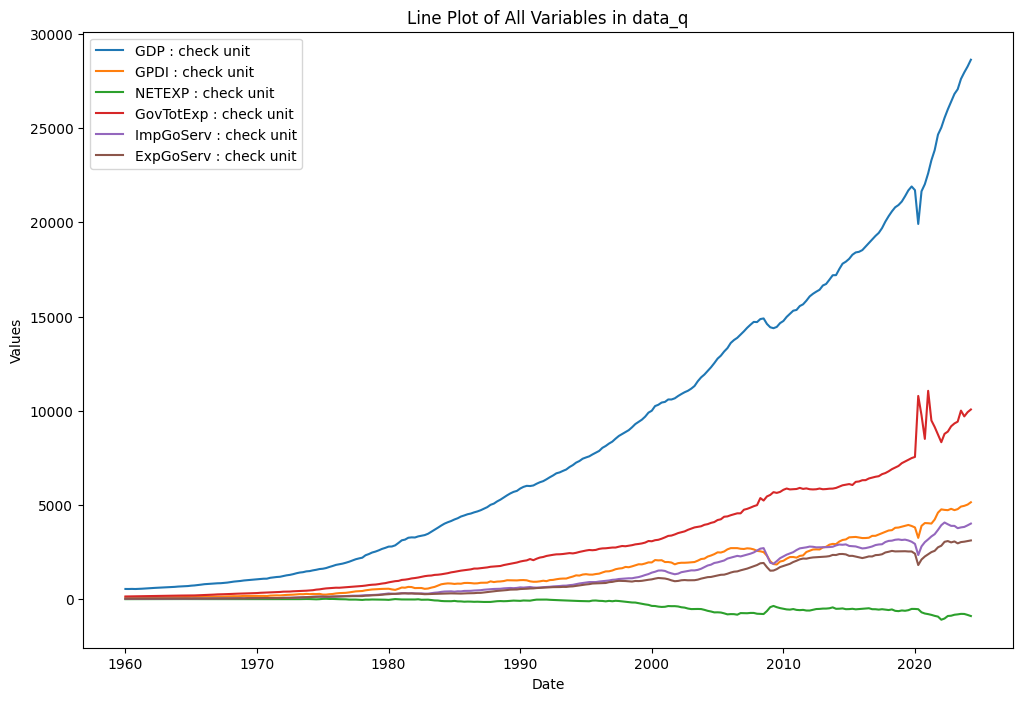

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_q is your dataframe

# Set the 'Date' column as the index if it is not already
if 'Date' in data_q.columns:
    data_q.set_index('Date', inplace=True)

# Plot all variables in data_q
plt.figure(figsize=(12, 8))
for column in data_q.columns:
    plt.plot(data_q.index, data_q[column], label=column)

plt.title('Line Plot of All Variables in data_q')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

This code below make 12 months out of the 4 month per year (quater) data set with the quarter imputation

In [49]:
# Set 'Date' as the index
data_q['Date'] = pd.to_datetime(data_q['Date'])
data_q.set_index('Date', inplace=True)

# Create a new monthly date range covering the full period of the quarterly data
monthly_date_range = pd.date_range(start=data_q.index.min(), end=data_q.index.max(), freq='MS')

# Create a new DataFrame with this monthly date range
data_m = pd.DataFrame(index=monthly_date_range)

# Join the monthly DataFrame with the quarterly data
data_m = data_m.join(data_q)

# Forward fill for all columns
data_m.ffill(inplace=True)

# Ensure the imputation carries forward each quarter's values for the next three months
for column in data_q.columns:
    data_m[column] = data_m[column].resample('MS').apply(lambda x: x[0])

# Reset index to have the 'Date' column
data_m.reset_index(inplace=True)
data_m.rename(columns={'index': 'Date'}, inplace=True)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Monthly Data with Imputed Values", dataframe=data_m)

data_m

/var/folders/nk/5g8df1k14r5f9gfjzz29tky40000gn/T/ipykernel_96619/1135521438.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_m[column] = data_m[column].resample('MS').apply(lambda x: x[0])


,Date,GDP : check unit,GPDI : check unit,NETEXP : check unit,GovTotExp : check unit,ImpGoServ : check unit,ExpGoServ : check unit
0,1960-01-01,542.648,96.476,2.858,144.233,23.288,26.145
1,1960-02-01,542.648,96.476,2.858,144.233,23.288,26.145
2,1960-03-01,542.648,96.476,2.858,144.233,23.288,26.145
3,1960-04-01,541.080,87.096,3.395,147.417,23.455,26.850
4,1960-05-01,541.080,87.096,3.395,147.417,23.455,26.850
...,...,...,...,...,...,...,...
767,2023-12-01,27956.998,4954.426,-783.734,9700.808,3835.394,3051.660
768,2024-01-01,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793
769,2024-02-01,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793
770,2024-03-01,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793


In [50]:
data_m['Date'].min(), data_m['Date'].max()

(Timestamp('1960-01-01 00:00:00'), Timestamp('2024-04-01 00:00:00'))

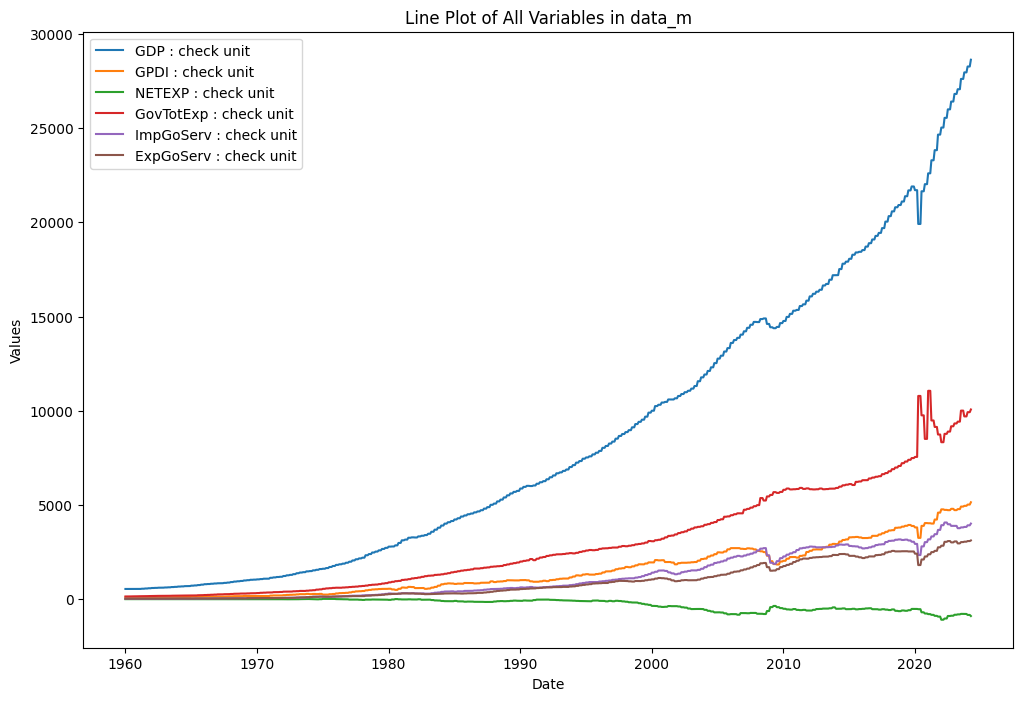

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_q is your dataframe

# Set the 'Date' column as the index if it is not already
if 'Date' in data_m.columns:
    data_m.set_index('Date', inplace=True)

# Plot all variables in data_q
plt.figure(figsize=(12, 8))
for column in data_m.columns:
    plt.plot(data_m.index, data_m[column], label=column)

plt.title('Line Plot of All Variables in data_m')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

### Data Quarter -> Month Out

In [54]:
data_m.to_csv('economic_data.csv', index=True)

### Data In

In [108]:
data_m_prev_q = pd.read_csv('economic_data.csv')
data_m_prev_q.head()


,Date,GDP : check unit,GPDI : check unit,NETEXP : check unit,GovTotExp : check unit,ImpGoServ : check unit,ExpGoServ : check unit
0,1960-01-01,542.648,96.476,2.858,144.233,23.288,26.145
1,1960-02-01,542.648,96.476,2.858,144.233,23.288,26.145
2,1960-03-01,542.648,96.476,2.858,144.233,23.288,26.145
3,1960-04-01,541.080,87.096,3.395,147.417,23.455,26.850
4,1960-05-01,541.080,87.096,3.395,147.417,23.455,26.850


In [109]:
data_m_prev_q.shape

(772, 7)

In [110]:
data_m_prev_q_cut = data_m_prev_q[data_m_prev_q['Date'] >= '1982-01-01']
data_m_prev_q_cut

,Date,GDP : check unit,GPDI : check unit,NETEXP : check unit,GovTotExp : check unit,ImpGoServ : check unit,ExpGoServ : check unit
264,1982-01-01,3274.302,588.318,-16.276,1122.585,309.478,293.202
265,1982-02-01,3274.302,588.318,-16.276,1122.585,309.478,293.202
266,1982-03-01,3274.302,588.318,-16.276,1122.585,309.478,293.202
267,1982-04-01,3331.972,593.621,-4.386,1150.143,299.115,294.729
268,1982-05-01,3331.972,593.621,-4.386,1150.143,299.115,294.729
...,...,...,...,...,...,...,...
767,2023-12-01,27956.998,4954.426,-783.734,9700.808,3835.394,3051.660
768,2024-01-01,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793
769,2024-02-01,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793
770,2024-03-01,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793


### Loading Month -> Month Data + Meger

In [118]:
def gen_df_monthly(category, series):
    gen_ser = fred.get_series(series, frequency='m')
    return pd.DataFrame({'Date': gen_ser.index, category + ' : check unit' : gen_ser.values})


def merge_dataframes(dataframes, on_column):
    merged_df = dataframes[0]

    for df in dataframes[1:]:
        merged_df = pd.merge(merged_df, df, on=on_column)

    return merged_df

In [119]:
dataframes_list_monthly = [
    gen_df_monthly('Unempl', 'UNRATE'),
    gen_df_monthly('PCE', 'PCE'),
    gen_df_monthly('ProPriceInd', 'PPIACO'),
#    gen_df_monthly('GoldSilver', 'PCU2122212122210'),
#    gen_df_monthly('OliveOil', 'POLVOILUSDM'),
#    gen_df_monthly('ReEstLoans', 'CREACBM027NBOG'),
    gen_df_monthly('10yIntRate', 'REAINTRATREARAT10Y'),
#    gen_df_monthly('JonOpen', 'JTSJOL'),
    #gen_df_monthly('OilPrice', 'DCOILBRENTEU')
]

In [120]:
data_month = merge_dataframes(dataframes_list_monthly,'Date')
data_month

,Date,Unempl : check unit,PCE : check unit,ProPriceInd : check unit,10yIntRate : check unit
0,1982-01-01,8.6,1997.1,99.700,7.623742
1,1982-02-01,8.9,2021.2,99.800,7.656648
2,1982-03-01,9.0,2024.1,99.600,7.128993
3,1982-04-01,9.3,2026.3,99.600,7.408347
4,1982-05-01,9.4,2044.5,99.800,7.320041
...,...,...,...,...,...
505,2024-02-01,3.9,19136.0,254.926,1.616823
506,2024-03-01,3.8,19263.7,254.963,1.925969
507,2024-04-01,3.9,19302.7,256.772,1.938194
508,2024-05-01,4.0,19386.4,255.094,2.103399


In [121]:
data_month['Date'].min(), data_month['Date'].max()

(Timestamp('1982-01-01 00:00:00'), Timestamp('2024-06-01 00:00:00'))

In [122]:
data_month.to_csv('economic_data_monthly.csv', index=True)

In [123]:
data_month = pd.read_csv('economic_data_monthly.csv')
data_month.head()

,Unnamed: 0,Date,Unempl : check unit,PCE : check unit,ProPriceInd : check unit,10yIntRate : check unit
0,0,1982-01-01,8.6,1997.1,99.7,7.623742
1,1,1982-02-01,8.9,2021.2,99.8,7.656648
2,2,1982-03-01,9.0,2024.1,99.6,7.128993
3,3,1982-04-01,9.3,2026.3,99.6,7.408347
4,4,1982-05-01,9.4,2044.5,99.8,7.320041


In [124]:
data_month = data_month.drop(columns=['Unnamed: 0'])
data_month.head()

,Date,Unempl : check unit,PCE : check unit,ProPriceInd : check unit,10yIntRate : check unit
0,1982-01-01,8.6,1997.1,99.7,7.623742
1,1982-02-01,8.9,2021.2,99.8,7.656648
2,1982-03-01,9.0,2024.1,99.6,7.128993
3,1982-04-01,9.3,2026.3,99.6,7.408347
4,1982-05-01,9.4,2044.5,99.8,7.320041


In [125]:
print(data_m_prev_q_cut.shape,
data_month.shape)

(508, 7) (510, 5)


In [126]:
merged_data_month = pd.merge(data_m_prev_q_cut, data_month, on='Date')
merged_data_month

,Date,GDP : check unit,GPDI : check unit,NETEXP : check unit,GovTotExp : check unit,ImpGoServ : check unit,ExpGoServ : check unit,Unempl : check unit,PCE : check unit,ProPriceInd : check unit,10yIntRate : check unit
0,1982-01-01,3274.302,588.318,-16.276,1122.585,309.478,293.202,8.6,1997.1,99.700,7.623742
1,1982-02-01,3274.302,588.318,-16.276,1122.585,309.478,293.202,8.9,2021.2,99.800,7.656648
2,1982-03-01,3274.302,588.318,-16.276,1122.585,309.478,293.202,9.0,2024.1,99.600,7.128993
3,1982-04-01,3331.972,593.621,-4.386,1150.143,299.115,294.729,9.3,2026.3,99.600,7.408347
4,1982-05-01,3331.972,593.621,-4.386,1150.143,299.115,294.729,9.4,2044.5,99.800,7.320041
...,...,...,...,...,...,...,...,...,...,...,...
503,2023-12-01,27956.998,4954.426,-783.734,9700.808,3835.394,3051.660,3.7,19013.7,249.866,1.680899
504,2024-01-01,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.7,19028.0,251.306,1.680871
505,2024-02-01,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.9,19136.0,254.926,1.616823
506,2024-03-01,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.8,19263.7,254.963,1.925969


In [127]:
merged_data_month.isna().sum()

Date                        0
GDP : check unit            0
GPDI : check unit           0
NETEXP : check unit         0
GovTotExp : check unit      0
ImpGoServ : check unit      0
ExpGoServ : check unit      0
Unempl : check unit         0
PCE : check unit            0
ProPriceInd : check unit    0
10yIntRate : check unit     0
dtype: int64

In [130]:
merged_data_month.to_csv('economic_data_monthly_complete.csv', index=False)

In [18]:
df = pd.read_csv('economic_data_monthly_complete.csv')
df

,Date,GDP : check unit,GPDI : check unit,NETEXP : check unit,GovTotExp : check unit,ImpGoServ : check unit,ExpGoServ : check unit,Unempl : check unit,PCE : check unit,ProPriceInd : check unit,10yIntRate : check unit
0,1982-01-01,3274.302,588.318,-16.276,1122.585,309.478,293.202,8.6,1997.1,99.700,7.623742
1,1982-02-01,3274.302,588.318,-16.276,1122.585,309.478,293.202,8.9,2021.2,99.800,7.656648
2,1982-03-01,3274.302,588.318,-16.276,1122.585,309.478,293.202,9.0,2024.1,99.600,7.128993
3,1982-04-01,3331.972,593.621,-4.386,1150.143,299.115,294.729,9.3,2026.3,99.600,7.408347
4,1982-05-01,3331.972,593.621,-4.386,1150.143,299.115,294.729,9.4,2044.5,99.800,7.320041
...,...,...,...,...,...,...,...,...,...,...,...
503,2023-12-01,27956.998,4954.426,-783.734,9700.808,3835.394,3051.660,3.7,19013.7,249.866,1.680899
504,2024-01-01,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.7,19028.0,251.306,1.680871
505,2024-02-01,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.9,19136.0,254.926,1.616823
506,2024-03-01,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.8,19263.7,254.963,1.925969


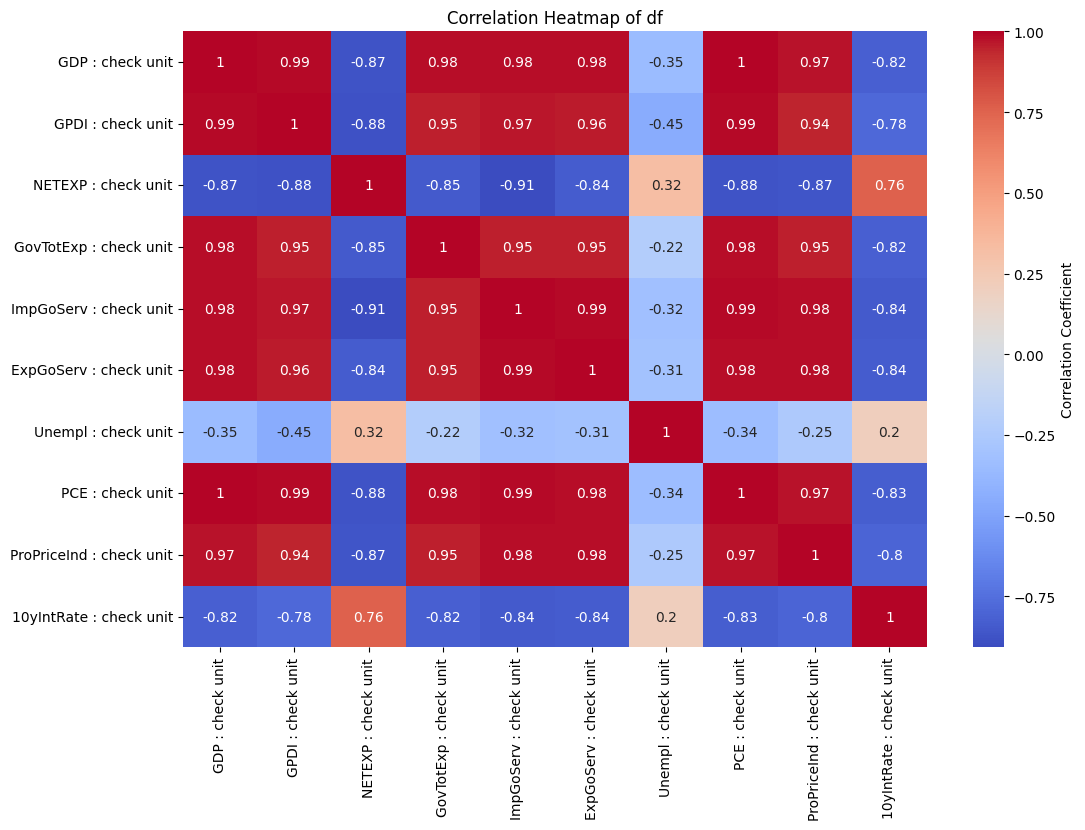

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataframe

# Remove the 'Date' column if it exists
if 'Date' in df.columns:
    df_no_date = df.drop(columns=['Date'])
else:
    df_no_date = df

# Calculate the correlation matrix
correlation_matrix = df_no_date.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of df')
plt.show()

### Global Parameter

In [8]:
def gen_df_monthly(category, series):
    gen_ser = fred.get_series(series, frequency='m')
    return pd.DataFrame({'Date': gen_ser.index, category + ' : check unit' : gen_ser.values})


def merge_dataframes(dataframes, on_column):
    merged_df = dataframes[0]

    for df in dataframes[1:]:
        merged_df = pd.merge(merged_df, df, on=on_column)

    return merged_df

In [9]:
dataframes_list_additional_var = [
    gen_df_monthly('GloWheat', 'PWHEAMTUSDM'),
    gen_df_monthly('GloUranium', 'PURANUSDM'),
    gen_df_monthly('GloPalmOil', 'PPOILUSDM'),
    gen_df_monthly('GloBrentCrude', 'POILBREUSDM'),
]

In [10]:
data_additional_month = merge_dataframes(dataframes_list_additional_var,'Date')
data_additional_month

,Date,GloWheat : check unit,GloUranium : check unit,GloPalmOil : check unit,GloBrentCrude : check unit
0,1980-01-01,NaN,NaN,NaN,NaN
1,1980-02-01,NaN,NaN,NaN,NaN
2,1980-03-01,NaN,NaN,NaN,NaN
3,1980-04-01,NaN,NaN,NaN,NaN
4,1980-05-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...
529,2024-02-01,219.238068,81.318201,825.089026,81.795714
530,2024-03-01,211.841017,71.814275,899.043923,84.961429
531,2024-04-01,208.381685,71.638853,896.872618,88.974545
532,2024-05-01,227.430770,73.950191,826.166095,83.053913


In [7]:
data_additional_month['Date'].min(), data_additional_month['Date'].max()

(Timestamp('1980-01-01 00:00:00'), Timestamp('2024-06-01 00:00:00'))

In [11]:
data_additional_month.isna().sum()

Date                            0
GloWheat : check unit         120
GloUranium : check unit       120
GloPalmOil : check unit       120
GloBrentCrude : check unit    120
dtype: int64

In [12]:
data_additional_month_cut = data_additional_month[data_additional_month['Date'] >= '1990-01-01']
data_additional_month_cut

,Date,GloWheat : check unit,GloUranium : check unit,GloPalmOil : check unit,GloBrentCrude : check unit
120,1990-01-01,167.918579,9.000000,230.555951,20.989130
121,1990-02-01,160.937271,8.800000,223.945027,19.702500
122,1990-03-01,156.528030,8.800000,236.340509,18.465909
123,1990-04-01,159.467529,8.650000,220.639566,16.926190
124,1990-05-01,149.179291,9.350000,232.208681,16.671739
...,...,...,...,...,...
529,2024-02-01,219.238068,81.318201,825.089026,81.795714
530,2024-03-01,211.841017,71.814275,899.043923,84.961429
531,2024-04-01,208.381685,71.638853,896.872618,88.974545
532,2024-05-01,227.430770,73.950191,826.166095,83.053913


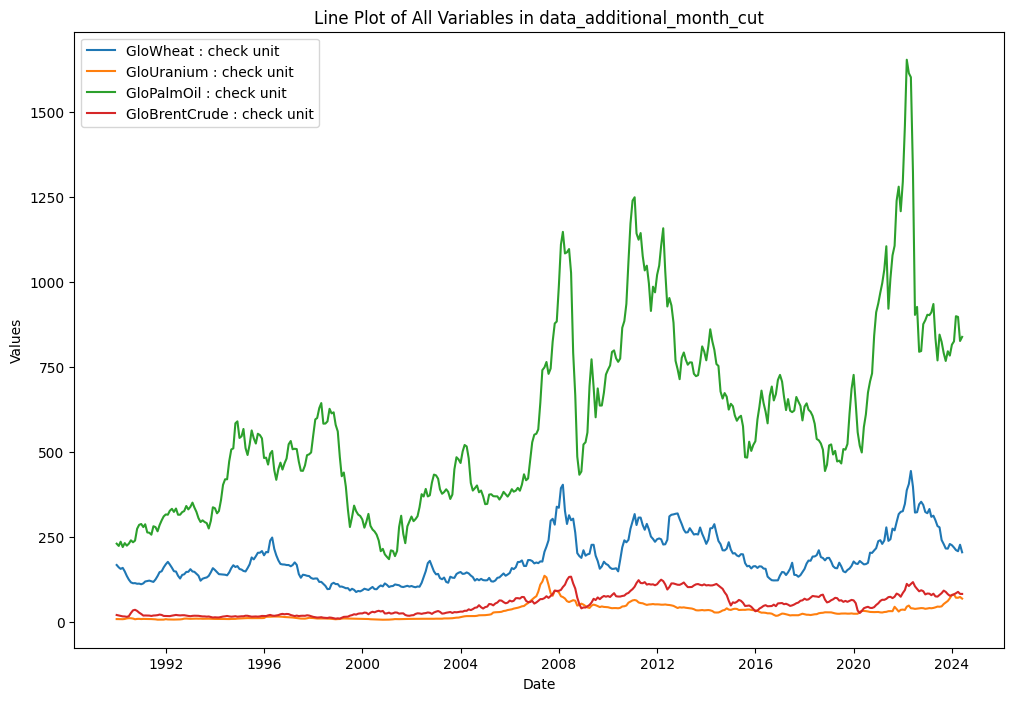

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_q is your dataframe

# Set the 'Date' column as the index if it is not already
if 'Date' in data_additional_month_cut.columns:
    data_additional_month_cut.set_index('Date', inplace=True)

# Plot all variables in data_q
plt.figure(figsize=(12, 8))
for column in data_additional_month_cut.columns:
    plt.plot(data_additional_month_cut.index, data_additional_month_cut[column], label=column)

plt.title('Line Plot of All Variables in data_additional_month_cut')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [13]:
import pandas as pd

def resample_and_impute(df, frequency='D'):
    """
    Resample a DataFrame from quarterly to a specified frequency and impute missing values.

    Parameters:
    df (pd.DataFrame): The input DataFrame with quarterly data and a 'Date' column.
    frequency (str): The frequency to resample the data to (e.g., 'D' for daily, 'M' for monthly).

    Returns:
    pd.DataFrame: The resampled and imputed DataFrame.
    """
    # Set 'Date' as the index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Create a new date range covering the full period of the quarterly data
    new_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq=frequency)

    # Create a new DataFrame with this date range
    data_resampled = pd.DataFrame(index=new_date_range)

    # Join the new DataFrame with the quarterly data
    data_resampled = data_resampled.join(df)

    # Forward fill for all columns
    data_resampled.ffill(inplace=True)

    # Ensure the imputation carries forward each quarter's values
    for column in df.columns:
        data_resampled[column] = data_resampled[column].resample(frequency).apply(lambda x: x[0])

    # Reset index to have the 'Date' column
    data_resampled.reset_index(inplace=True)
    data_resampled.rename(columns={'index': 'Date'}, inplace=True)

    return data_resampled


In [14]:
data_additional_day = resample_and_impute(data_additional_month_cut, frequency='D')
data_additional_day

/var/folders/nk/5g8df1k14r5f9gfjzz29tky40000gn/T/ipykernel_99785/4125156481.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
/var/folders/nk/5g8df1k14r5f9gfjzz29tky40000gn/T/ipykernel_99785/4125156481.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_resampled[column] = data_resampled[column].resample(frequency).apply(lambda x: x[0])


,Date,GloWheat : check unit,GloUranium : check unit,GloPalmOil : check unit,GloBrentCrude : check unit
0,1990-01-01,167.918579,9.000000,230.555951,20.989130
1,1990-01-02,167.918579,9.000000,230.555951,20.989130
2,1990-01-03,167.918579,9.000000,230.555951,20.989130
3,1990-01-04,167.918579,9.000000,230.555951,20.989130
4,1990-01-05,167.918579,9.000000,230.555951,20.989130
...,...,...,...,...,...
12566,2024-05-28,227.430770,73.950191,826.166095,83.053913
12567,2024-05-29,227.430770,73.950191,826.166095,83.053913
12568,2024-05-30,227.430770,73.950191,826.166095,83.053913
12569,2024-05-31,227.430770,73.950191,826.166095,83.053913


In [27]:
data_additional_day_cut = data_additional_day[data_additional_day['Date'] <= '2024-04-01']
data_additional_day_cut

,Date,GloWheat : check unit,GloUranium : check unit,GloPalmOil : check unit,GloBrentCrude : check unit
0,1990-01-01,167.918579,9.000000,230.555951,20.989130
1,1990-01-02,167.918579,9.000000,230.555951,20.989130
2,1990-01-03,167.918579,9.000000,230.555951,20.989130
3,1990-01-04,167.918579,9.000000,230.555951,20.989130
4,1990-01-05,167.918579,9.000000,230.555951,20.989130
...,...,...,...,...,...
12505,2024-03-28,211.841017,71.814275,899.043923,84.961429
12506,2024-03-29,211.841017,71.814275,899.043923,84.961429
12507,2024-03-30,211.841017,71.814275,899.043923,84.961429
12508,2024-03-31,211.841017,71.814275,899.043923,84.961429


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_all_variables(dataframe, date_column='Date', title='Line Plot of All Variables'):
    """
    Plots all variables in the given dataframe.

    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the data to plot.
    date_column (str): The name of the date column to set as the index.
    title (str): The title of the plot.
    """
    # Set the 'Date' column as the index if it is not already
    if date_column in dataframe.columns:
        dataframe = dataframe.set_index(date_column)

    # Plot all variables in the dataframe
    plt.figure(figsize=(12, 8))
    for column in dataframe.columns:
        plt.plot(dataframe.index, dataframe[column], label=column)

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

# Example usage:
# plot_all_variables(data_additional_month_cut)

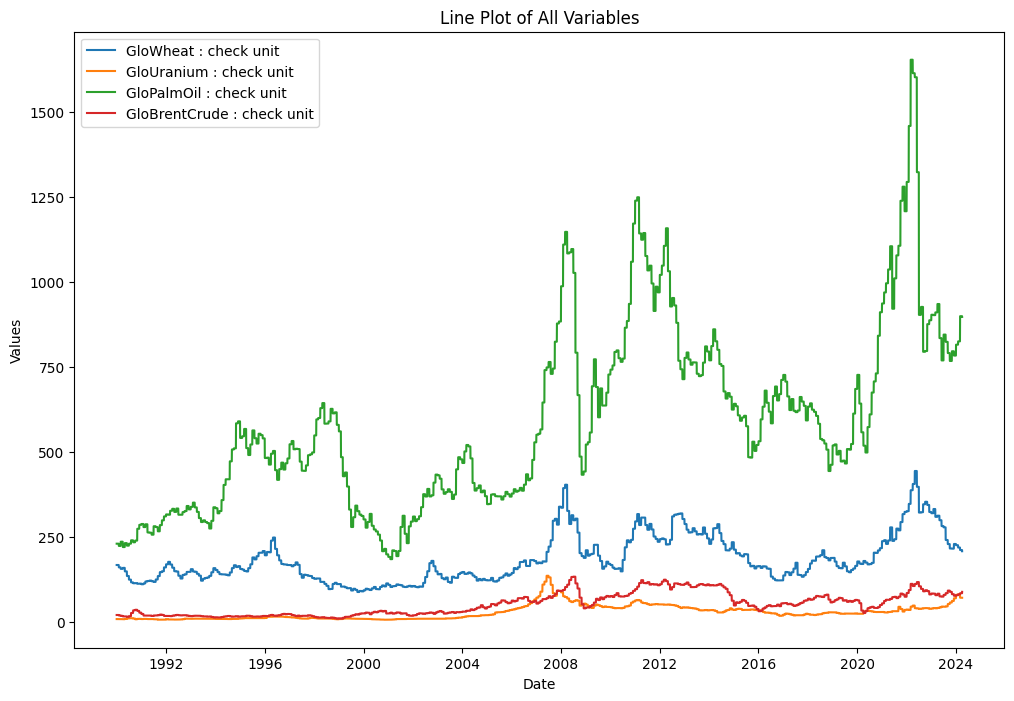

In [28]:
plot_all_variables(data_additional_day_cut)

In [20]:
econ_data = pd.read_csv('economic_data_daily.csv')
econ_data

,Date,GDP : check unit,GPDI : check unit,NETEXP : check unit,GovTotExp : check unit,ImpGoServ : check unit,ExpGoServ : check unit,Unempl : check unit,PCE : check unit,ProPriceInd : check unit,10yIntRate : check unit
0,1982-01-01,3274.302,588.318,-16.276,1122.585,309.478,293.202,8.6,1997.1,99.700,7.623742
1,1982-01-02,3274.302,588.318,-16.276,1122.585,309.478,293.202,8.6,1997.1,99.700,7.623742
2,1982-01-03,3274.302,588.318,-16.276,1122.585,309.478,293.202,8.6,1997.1,99.700,7.623742
3,1982-01-04,3274.302,588.318,-16.276,1122.585,309.478,293.202,8.6,1997.1,99.700,7.623742
4,1982-01-05,3274.302,588.318,-16.276,1122.585,309.478,293.202,8.6,1997.1,99.700,7.623742
...,...,...,...,...,...,...,...,...,...,...,...
15427,2024-03-28,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.8,19263.7,254.963,1.925969
15428,2024-03-29,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.8,19263.7,254.963,1.925969
15429,2024-03-30,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.8,19263.7,254.963,1.925969
15430,2024-03-31,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.8,19263.7,254.963,1.925969


In [22]:
# merged_data_day = pd.merge(econ_data, data_additional_day, on='Date')
# # merged_data_day

In [23]:
econ_data_cut = econ_data[econ_data['Date'] >= '1990-01-01']
econ_data_cut

,Date,GDP : check unit,GPDI : check unit,NETEXP : check unit,GovTotExp : check unit,ImpGoServ : check unit,ExpGoServ : check unit,Unempl : check unit,PCE : check unit,ProPriceInd : check unit,10yIntRate : check unit
2922,1990-01-01,5872.701,1010.838,-88.536,1998.201,626.767,538.232,5.4,3730.7,114.900,4.127623
2923,1990-01-02,5872.701,1010.838,-88.536,1998.201,626.767,538.232,5.4,3730.7,114.900,4.127623
2924,1990-01-03,5872.701,1010.838,-88.536,1998.201,626.767,538.232,5.4,3730.7,114.900,4.127623
2925,1990-01-04,5872.701,1010.838,-88.536,1998.201,626.767,538.232,5.4,3730.7,114.900,4.127623
2926,1990-01-05,5872.701,1010.838,-88.536,1998.201,626.767,538.232,5.4,3730.7,114.900,4.127623
...,...,...,...,...,...,...,...,...,...,...,...
15427,2024-03-28,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.8,19263.7,254.963,1.925969
15428,2024-03-29,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.8,19263.7,254.963,1.925969
15429,2024-03-30,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.8,19263.7,254.963,1.925969
15430,2024-03-31,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.8,19263.7,254.963,1.925969


In [30]:
print(econ_data_cut.shape, data_additional_day_cut.shape)

(12510, 11) (12510, 5)


In [31]:
import pandas as pd

# Assuming econ_data_cut and data_additional_day_cut are your dataframes

# Ensure 'Date' columns are in datetime format
econ_data_cut['Date'] = pd.to_datetime(econ_data_cut['Date'])
data_additional_day_cut['Date'] = pd.to_datetime(data_additional_day_cut['Date'])

# Merge the dataframes on the 'Date' column
merged_data_daily = pd.merge(econ_data_cut, data_additional_day_cut, on='Date', how='outer')

# Display the merged dataframe
merged_data_daily

/var/folders/nk/5g8df1k14r5f9gfjzz29tky40000gn/T/ipykernel_99785/996649544.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ_data_cut['Date'] = pd.to_datetime(econ_data_cut['Date'])
/var/folders/nk/5g8df1k14r5f9gfjzz29tky40000gn/T/ipykernel_99785/996649544.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_additional_day_cut['Date'] = pd.to_datetime(data_additional_day_cut['Date'])


,Date,GDP : check unit,GPDI : check unit,NETEXP : check unit,GovTotExp : check unit,ImpGoServ : check unit,ExpGoServ : check unit,Unempl : check unit,PCE : check unit,ProPriceInd : check unit,10yIntRate : check unit,GloWheat : check unit,GloUranium : check unit,GloPalmOil : check unit,GloBrentCrude : check unit
0,1990-01-01,5872.701,1010.838,-88.536,1998.201,626.767,538.232,5.4,3730.7,114.900,4.127623,167.918579,9.000000,230.555951,20.989130
1,1990-01-02,5872.701,1010.838,-88.536,1998.201,626.767,538.232,5.4,3730.7,114.900,4.127623,167.918579,9.000000,230.555951,20.989130
2,1990-01-03,5872.701,1010.838,-88.536,1998.201,626.767,538.232,5.4,3730.7,114.900,4.127623,167.918579,9.000000,230.555951,20.989130
3,1990-01-04,5872.701,1010.838,-88.536,1998.201,626.767,538.232,5.4,3730.7,114.900,4.127623,167.918579,9.000000,230.555951,20.989130
4,1990-01-05,5872.701,1010.838,-88.536,1998.201,626.767,538.232,5.4,3730.7,114.900,4.127623,167.918579,9.000000,230.555951,20.989130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12505,2024-03-28,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.8,19263.7,254.963,1.925969,211.841017,71.814275,899.043923,84.961429
12506,2024-03-29,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.8,19263.7,254.963,1.925969,211.841017,71.814275,899.043923,84.961429
12507,2024-03-30,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.8,19263.7,254.963,1.925969,211.841017,71.814275,899.043923,84.961429
12508,2024-03-31,28269.174,5020.538,-834.896,9925.034,3919.689,3084.793,3.8,19263.7,254.963,1.925969,211.841017,71.814275,899.043923,84.961429


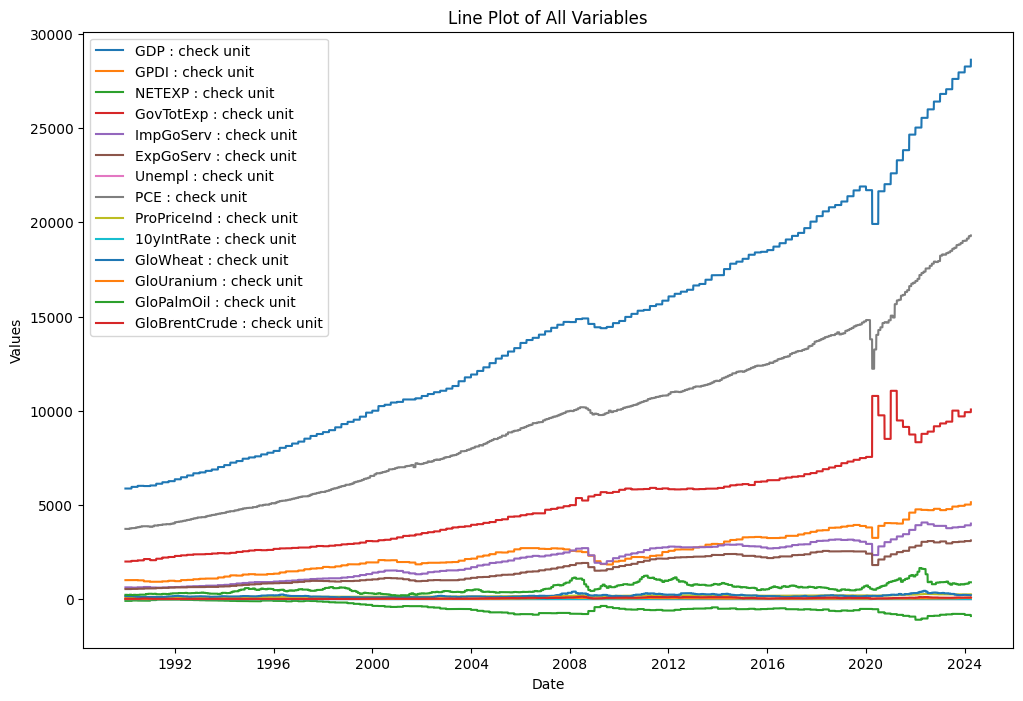

In [32]:
plot_all_variables(merged_data_daily)

In [33]:
merged_data_daily.to_csv('economic_data_daily_level_v1.csv', index=False)

### More parameters (econ daily 1001)

In [124]:
def gen_df_monthly(category, series):
    gen_ser = fred.get_series(series, frequency='d')
    return pd.DataFrame({'Date': gen_ser.index, category + ' : check unit' : gen_ser.values})


def merge_dataframes(dataframes, on_column):
    merged_df = dataframes[0]

    for df in dataframes[1:]:
        merged_df = pd.merge(merged_df, df, on=on_column)

    return merged_df

In [125]:
dataframes_list_additional_var = [
    gen_df_monthly('SP500', 'SP500'),
    gen_df_monthly('Dow_Jones', 'DJIA'),
    gen_df_monthly('NASDAQ', 'NASDAQCOM'),
    # gen_df_monthly('Federal_Debt', 'GFDEBTN'),
    # gen_df_monthly('Real_Estate_Loans', 'CREACBM027NBOG')
]

In [126]:
data_additional_daily = merge_dataframes(dataframes_list_additional_var,'Date')
data_additional_daily

,Date,SP500 : check unit,Dow_Jones : check unit,NASDAQ : check unit
0,2014-08-11,1936.92,16569.98,4401.33
1,2014-08-12,1933.75,16560.54,4389.25
2,2014-08-13,1946.72,16651.80,4434.13
3,2014-08-14,1955.18,16713.58,4453.00
4,2014-08-15,1955.06,16662.91,4464.93
...,...,...,...,...
2604,2024-08-02,5346.56,39737.26,16776.16
2605,2024-08-05,5186.33,38703.27,16200.08
2606,2024-08-06,5240.03,38997.66,16366.85
2607,2024-08-07,5199.50,38763.45,16195.81


In [127]:
data_additional_daily['Date'].min(), data_additional_daily['Date'].max()

(Timestamp('2014-08-11 00:00:00'), Timestamp('2024-08-08 00:00:00'))

In [128]:
data_additional_daily.isna().sum()

Date                       0
SP500 : check unit        93
Dow_Jones : check unit    93
NASDAQ : check unit       92
dtype: int64

In [129]:
data_additional_daily_cut = data_additional_daily[data_additional_daily['Date'] >= '2014-09-01']
data_additional_daily_cut

,Date,SP500 : check unit,Dow_Jones : check unit,NASDAQ : check unit
15,2014-09-01,NaN,NaN,NaN
16,2014-09-02,2002.28,17067.56,4598.19
17,2014-09-03,2000.72,17078.28,4572.57
18,2014-09-04,1997.65,17069.58,4562.29
19,2014-09-05,2007.71,17137.36,4582.90
...,...,...,...,...
2604,2024-08-02,5346.56,39737.26,16776.16
2605,2024-08-05,5186.33,38703.27,16200.08
2606,2024-08-06,5240.03,38997.66,16366.85
2607,2024-08-07,5199.50,38763.45,16195.81


In [130]:
data_additional_daily_cut = data_additional_daily_cut[data_additional_daily_cut['Date'] <= '2024-07-01']
data_additional_daily_cut

,Date,SP500 : check unit,Dow_Jones : check unit,NASDAQ : check unit
15,2014-09-01,NaN,NaN,NaN
16,2014-09-02,2002.28,17067.56,4598.19
17,2014-09-03,2000.72,17078.28,4572.57
18,2014-09-04,1997.65,17069.58,4562.29
19,2014-09-05,2007.71,17137.36,4582.90
...,...,...,...,...
2576,2024-06-25,5469.30,39112.16,17717.65
2577,2024-06-26,5477.90,39127.80,17805.16
2578,2024-06-27,5482.87,39164.06,17858.68
2579,2024-06-28,5460.48,39118.86,17732.60


In [131]:
data_additional_daily_cut.isna().sum()

Date                       0
SP500 : check unit        92
Dow_Jones : check unit    92
NASDAQ : check unit       91
dtype: int64

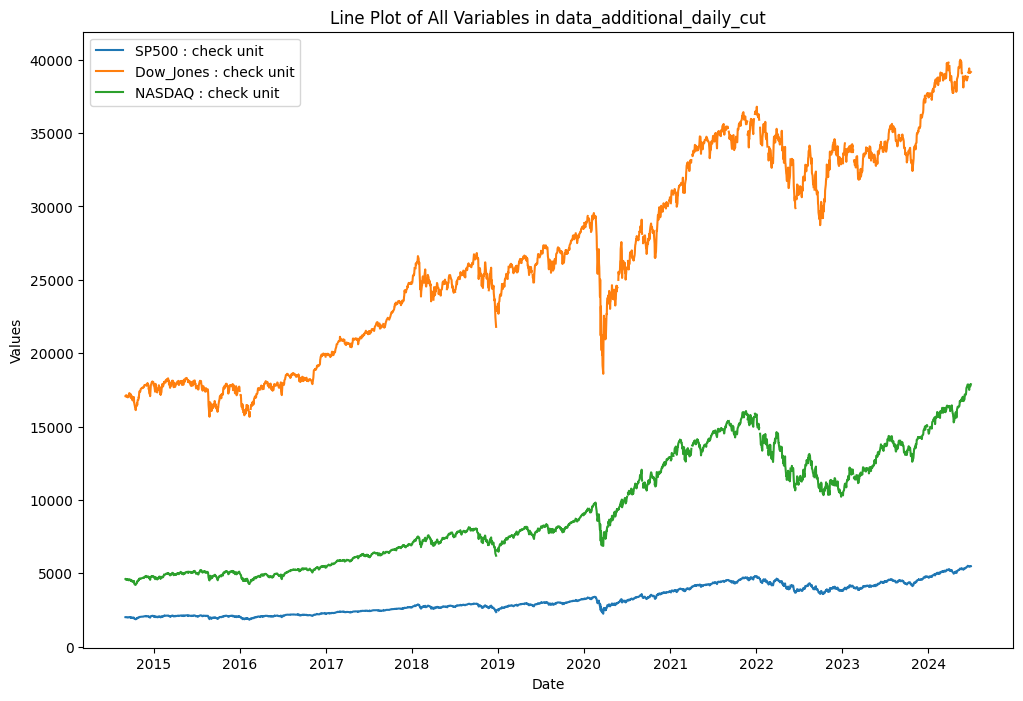

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_q is your dataframe

# Set the 'Date' column as the index if it is not already
if 'Date' in data_additional_daily_cut.columns:
    data_additional_daily_cut.set_index('Date', inplace=True)

# Plot all variables in data_q
plt.figure(figsize=(12, 8))
for column in data_additional_daily_cut.columns:
    plt.plot(data_additional_daily_cut.index, data_additional_daily_cut[column], label=column)

plt.title('Line Plot of All Variables in data_additional_daily_cut')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [133]:
new_data_additional_daily_cut = data_additional_daily_cut.fillna(method='ffill')

/var/folders/nk/5g8df1k14r5f9gfjzz29tky40000gn/T/ipykernel_12103/1064308918.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_data_additional_daily_cut = data_additional_daily_cut.fillna(method='ffill')


In [134]:
data_additional_daily_cut.isna().sum()

SP500 : check unit        92
Dow_Jones : check unit    92
NASDAQ : check unit       91
dtype: int64

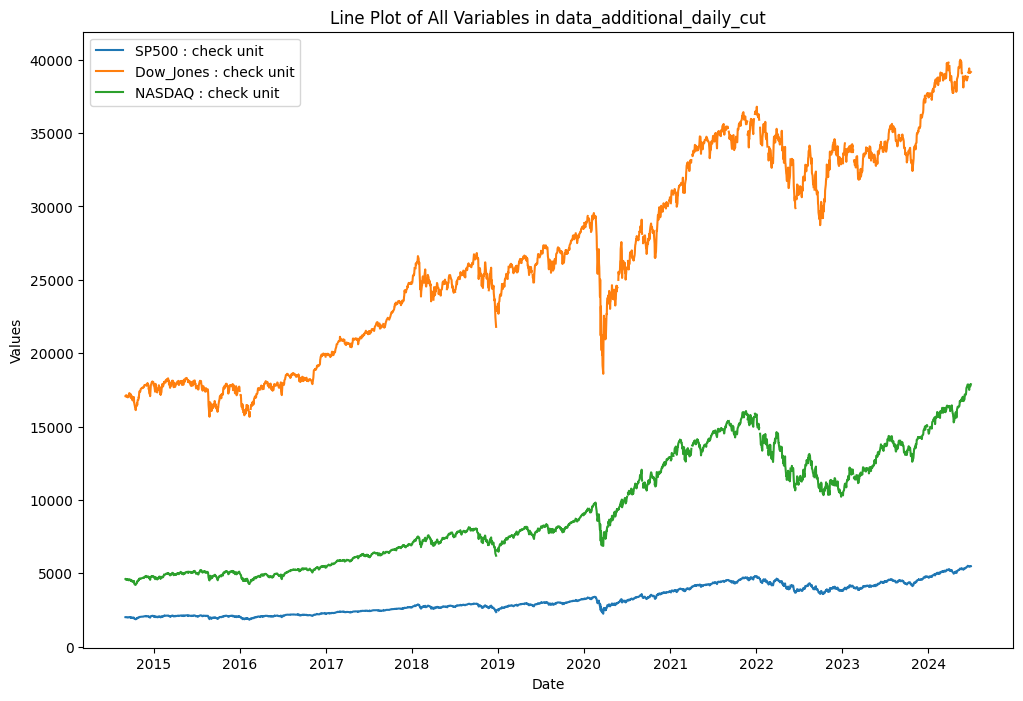

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_q is your dataframe

# Set the 'Date' column as the index if it is not already
if 'Date' in data_additional_daily_cut.columns:
    data_additional_daily_cut.set_index('Date', inplace=True)

# Plot all variables in data_q
plt.figure(figsize=(12, 8))
for column in data_additional_daily_cut.columns:
    plt.plot(data_additional_daily_cut.index, data_additional_daily_cut[column], label=column)

plt.title('Line Plot of All Variables in data_additional_daily_cut')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [136]:
new_data_additional_daily_cut.isna().sum()

SP500 : check unit        1
Dow_Jones : check unit    1
NASDAQ : check unit       1
dtype: int64

In [137]:
import pandas as pd

new_data_additional_daily_cut = pd.DataFrame(new_data_additional_daily_cut)

In [138]:
data_additional_daily_cut = data_additional_daily_cut.rename(columns={'SP500 : check unit': 'SP500', 'Dow_Jones : check unit': 'Dow_Jones', 'NASDAQ : check unit': 'NASDAQ'})
data_additional_daily_cut

,SP500,Dow_Jones,NASDAQ
Date,,,
2014-09-01,NaN,NaN,NaN
2014-09-02,2002.28,17067.56,4598.19
2014-09-03,2000.72,17078.28,4572.57
2014-09-04,1997.65,17069.58,4562.29
2014-09-05,2007.71,17137.36,4582.90
...,...,...,...
2024-06-25,5469.30,39112.16,17717.65
2024-06-26,5477.90,39127.80,17805.16
2024-06-27,5482.87,39164.06,17858.68


In [139]:
data_additional_daily.reset_index(inplace=True)
data_additional_daily

,index,Date,SP500 : check unit,Dow_Jones : check unit,NASDAQ : check unit
0,0,2014-08-11,1936.92,16569.98,4401.33
1,1,2014-08-12,1933.75,16560.54,4389.25
2,2,2014-08-13,1946.72,16651.80,4434.13
3,3,2014-08-14,1955.18,16713.58,4453.00
4,4,2014-08-15,1955.06,16662.91,4464.93
...,...,...,...,...,...
2604,2604,2024-08-02,5346.56,39737.26,16776.16
2605,2605,2024-08-05,5186.33,38703.27,16200.08
2606,2606,2024-08-06,5240.03,38997.66,16366.85
2607,2607,2024-08-07,5199.50,38763.45,16195.81


In [140]:
data_additional_daily_cut = data_additional_daily[data_additional_daily['Date'] >= '2014-09-02']
data_additional_daily_cut

,index,Date,SP500 : check unit,Dow_Jones : check unit,NASDAQ : check unit
16,16,2014-09-02,2002.28,17067.56,4598.19
17,17,2014-09-03,2000.72,17078.28,4572.57
18,18,2014-09-04,1997.65,17069.58,4562.29
19,19,2014-09-05,2007.71,17137.36,4582.90
20,20,2014-09-08,2001.54,17111.42,4592.29
...,...,...,...,...,...
2604,2604,2024-08-02,5346.56,39737.26,16776.16
2605,2605,2024-08-05,5186.33,38703.27,16200.08
2606,2606,2024-08-06,5240.03,38997.66,16366.85
2607,2607,2024-08-07,5199.50,38763.45,16195.81


In [141]:
data_additional_daily_cut = data_additional_daily_cut[data_additional_daily_cut['Date'] <= '2024-07-01']
data_additional_daily_cut

,index,Date,SP500 : check unit,Dow_Jones : check unit,NASDAQ : check unit
16,16,2014-09-02,2002.28,17067.56,4598.19
17,17,2014-09-03,2000.72,17078.28,4572.57
18,18,2014-09-04,1997.65,17069.58,4562.29
19,19,2014-09-05,2007.71,17137.36,4582.90
20,20,2014-09-08,2001.54,17111.42,4592.29
...,...,...,...,...,...
2576,2576,2024-06-25,5469.30,39112.16,17717.65
2577,2577,2024-06-26,5477.90,39127.80,17805.16
2578,2578,2024-06-27,5482.87,39164.06,17858.68
2579,2579,2024-06-28,5460.48,39118.86,17732.60


In [142]:
data_additional_daily_cut = data_additional_daily_cut.drop(columns=['index'])
data_additional_daily_cut

,Date,SP500 : check unit,Dow_Jones : check unit,NASDAQ : check unit
16,2014-09-02,2002.28,17067.56,4598.19
17,2014-09-03,2000.72,17078.28,4572.57
18,2014-09-04,1997.65,17069.58,4562.29
19,2014-09-05,2007.71,17137.36,4582.90
20,2014-09-08,2001.54,17111.42,4592.29
...,...,...,...,...
2576,2024-06-25,5469.30,39112.16,17717.65
2577,2024-06-26,5477.90,39127.80,17805.16
2578,2024-06-27,5482.87,39164.06,17858.68
2579,2024-06-28,5460.48,39118.86,17732.60


In [143]:
data_additional_daily_cut.to_csv('additional_data_daily_1001.csv', index=True)

### More Parameters (econ quarterly 1002)

In [56]:
def gen_df_monthly(category, series):
    gen_ser = fred.get_series(series, frequency='q')
    return pd.DataFrame({'Date': gen_ser.index, category + ' : check unit' : gen_ser.values})


def merge_dataframes(dataframes, on_column):
    merged_df = dataframes[0]

    for df in dataframes[1:]:
        merged_df = pd.merge(merged_df, df, on=on_column)

    return merged_df



dataframes_list_additional_var = [
    # gen_df_monthly('SP500', 'SP500'),
    # gen_df_monthly('Dow_Jones', 'DJIA'),
    # gen_df_monthly('NASDAQ', 'NASDAQCOM'),
     gen_df_monthly('Federal_Debt', 'GFDEBTN'),
    # gen_df_monthly('Real_Estate_Loans', 'CREACBM027NBOG')
]


data_additional_quart = merge_dataframes(dataframes_list_additional_var,'Date')

data_additional_quart

,Date,Federal_Debt : check unit
0,1966-01-01,320999.0
1,1966-04-01,316097.0
2,1966-07-01,324748.0
3,1966-10-01,329319.0
4,1967-01-01,330947.0
...,...,...
228,2023-01-01,31458438.0
229,2023-04-01,32332274.0
230,2023-07-01,33167334.0
231,2023-10-01,34001494.0


In [57]:
data_additional_quart_cut = data_additional_quart[data_additional_quart['Date'] >= '2014-08-01']
data_additional_quart_cut

,Date,Federal_Debt : check unit
195,2014-10-01,18141444.0
196,2015-01-01,18152056.0
197,2015-04-01,18151998.0
198,2015-07-01,18150618.0
199,2015-10-01,18922179.0
200,2016-01-01,19264939.0
201,2016-04-01,19381591.0
202,2016-07-01,19573445.0
203,2016-10-01,19976827.0
204,2017-01-01,19846420.0


In [45]:
data_additional_quart_cut = data_additional_quart_cut[data_additional_quart_cut['Date'] <= '2024-07-01']
data_additional_quart_cut

,Date,Federal_Debt : check unit
195,2014-10-01,18141444.0
196,2015-01-01,18152056.0
197,2015-04-01,18151998.0
198,2015-07-01,18150618.0
199,2015-10-01,18922179.0
200,2016-01-01,19264939.0
201,2016-04-01,19381591.0
202,2016-07-01,19573445.0
203,2016-10-01,19976827.0
204,2017-01-01,19846420.0


In [46]:
data_additional_quart_cut.isna().sum()

Date                         0
Federal_Debt : check unit    0
dtype: int64

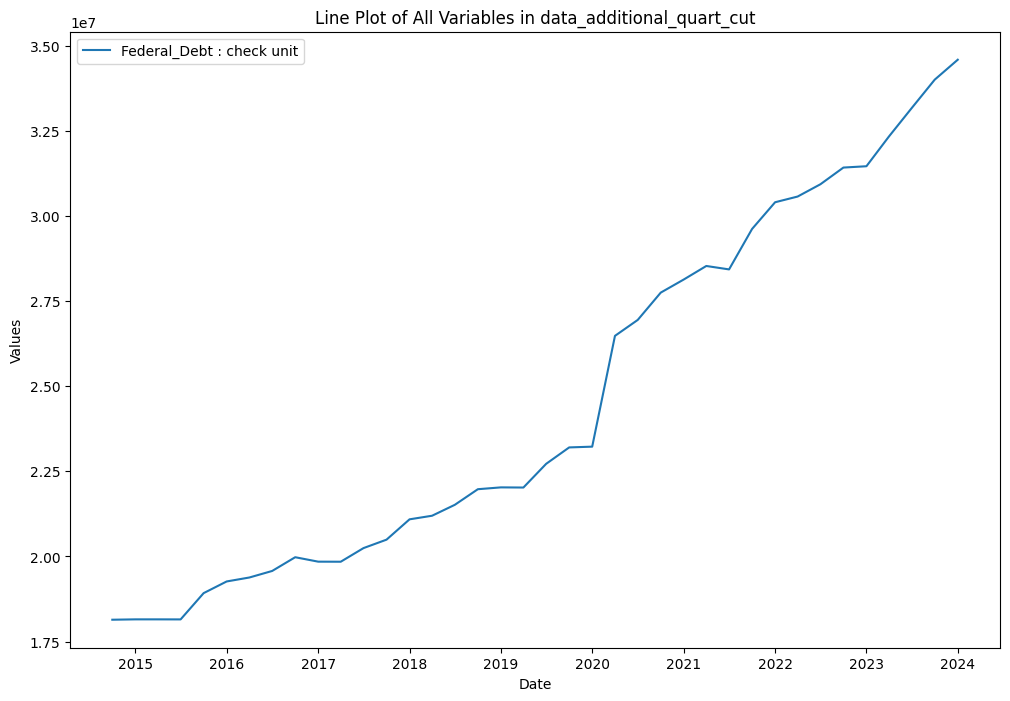

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_q is your dataframe

# Set the 'Date' column as the index if it is not already
if 'Date' in data_additional_quart_cut.columns:
    data_additional_quart_cut.set_index('Date', inplace=True)

# Plot all variables in data_q
plt.figure(figsize=(12, 8))
for column in data_additional_quart_cut.columns:
    plt.plot(data_additional_quart_cut.index, data_additional_quart_cut[column], label=column)

plt.title('Line Plot of All Variables in data_additional_quart_cut')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [54]:
data_additional_quart_cut.to_csv('additional_data_quart_1002.csv', index=True)

### More Parameters (econ monthly 1003)

In [49]:
def gen_df_monthly(category, series):
    gen_ser = fred.get_series(series, frequency='m')
    return pd.DataFrame({'Date': gen_ser.index, category + ' : check unit' : gen_ser.values})


def merge_dataframes(dataframes, on_column):
    merged_df = dataframes[0]

    for df in dataframes[1:]:
        merged_df = pd.merge(merged_df, df, on=on_column)

    return merged_df



dataframes_list_additional_var = [
    # gen_df_monthly('SP500', 'SP500'),
    # gen_df_monthly('Dow_Jones', 'DJIA'),
    # gen_df_monthly('NASDAQ', 'NASDAQCOM'),
    # gen_df_monthly('Federal_Debt', 'GFDEBTN'),
     gen_df_monthly('Real_Estate_Loans', 'CREACBM027NBOG')
]


data_additional_monthly = merge_dataframes(dataframes_list_additional_var,'Date')

data_additional_monthly

,Date,Real_Estate_Loans : check unit
0,2004-06-01,1001.5327
1,2004-07-01,1011.6746
2,2004-08-01,1023.8982
3,2004-09-01,1039.1405
4,2004-10-01,1054.8952
...,...,...
237,2024-03-01,2987.0843
238,2024-04-01,2996.2727
239,2024-05-01,2999.6959
240,2024-06-01,2994.9243


In [50]:
data_additional_monthly_cut = data_additional_monthly[data_additional_monthly['Date'] >= '2014-09-01']
data_additional_monthly_cut

,Date,Real_Estate_Loans : check unit
123,2014-09-01,1578.4896
124,2014-10-01,1585.1146
125,2014-11-01,1595.9346
126,2014-12-01,1609.3538
127,2015-01-01,1617.9403
...,...,...
237,2024-03-01,2987.0843
238,2024-04-01,2996.2727
239,2024-05-01,2999.6959
240,2024-06-01,2994.9243


In [51]:
data_additional_monthly_cut = data_additional_monthly_cut[data_additional_monthly_cut['Date'] <= '2024-07-01']
data_additional_monthly_cut

,Date,Real_Estate_Loans : check unit
123,2014-09-01,1578.4896
124,2014-10-01,1585.1146
125,2014-11-01,1595.9346
126,2014-12-01,1609.3538
127,2015-01-01,1617.9403
...,...,...
237,2024-03-01,2987.0843
238,2024-04-01,2996.2727
239,2024-05-01,2999.6959
240,2024-06-01,2994.9243


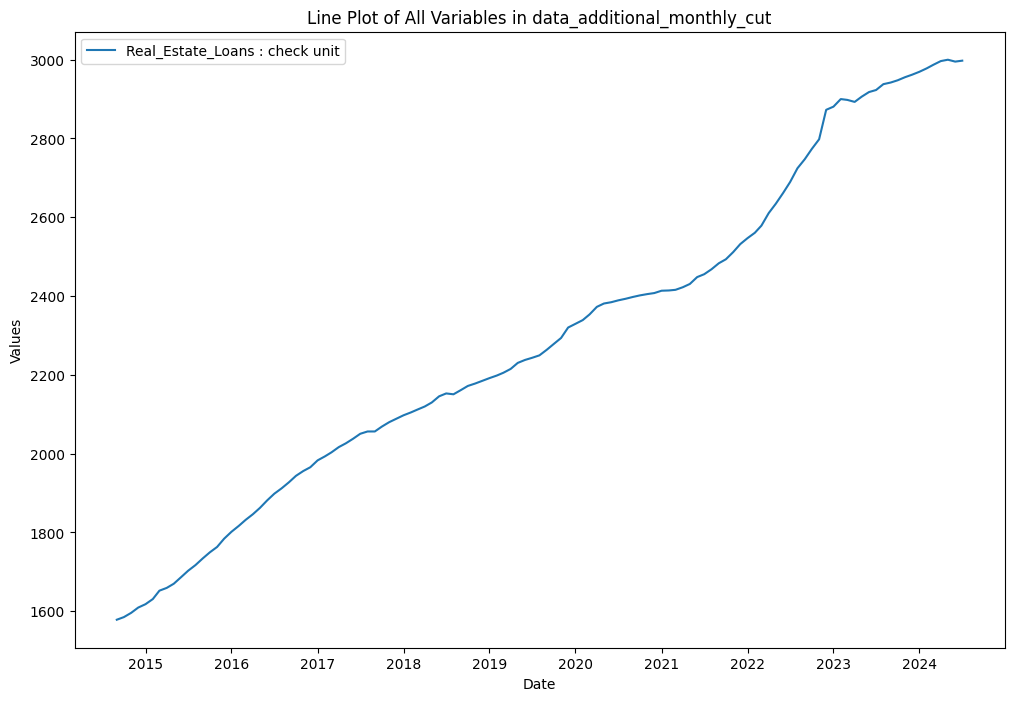

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_q is your dataframe

# Set the 'Date' column as the index if it is not already
if 'Date' in data_additional_monthly_cut.columns:
    data_additional_monthly_cut.set_index('Date', inplace=True)

# Plot all variables in data_q
plt.figure(figsize=(12, 8))
for column in data_additional_monthly_cut.columns:
    plt.plot(data_additional_monthly_cut.index, data_additional_monthly_cut[column], label=column)

plt.title('Line Plot of All Variables in data_additional_monthly_cut')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [55]:
data_additional_monthly_cut.to_csv('additional_data_monthly_1003.csv', index=True)